# Produce a surf report

In [83]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
import pandas as pd
import matplotlib.patheffects as pe


from pysurfline import SpotForecast

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


List of known spot id

| Spot Id | Name |
|---|---|
| 5842041f4e65fad6a7708890 | Pipeline (USA)|
| 584204204e65fad6a7709b09 | Varazze (ITA)|

In [84]:
params = {
    "spotId": "584204204e65fad6a7709b09",
    "days": 5,
    "intervalHours": 3,
}
spot = SpotForecast(params, verbose=True)


-----
ForecastGetter(Type:wave, Status:200)
-----
ForecastGetter(Type:wind, Status:200)
-----
ForecastGetter(Type:tides, Status:200)
-----
ForecastGetter(Type:weather, Status:200)


In [85]:
report = []
for attr in [
    "wave",
    "wind",
    "weather",
]:  # exclude "tides" because of HIGH LOW exact times
    report.append(spot.get_dataframe(attr))
report = pd.concat(report, axis=1)
report.head()


,utcOffset,surf_min,surf_max,surf_optimalScore,swells,utcOffset,speed,direction,directionType,gust,optimalScore,utcOffset,temperature,condition
timestamp,,,,,,,,,,,,,,
2022-02-12 23:00:00,1,0.0,0.16,0,"[{'height': 0.89362, 'period': 4, 'direction':...",1,21.38013,332.07711,Offshore,31.69228,2,1,6.55508,NIGHT_CLEAR
2022-02-13 02:00:00,1,0.0,0.18,0,"[{'height': 0.67722, 'period': 4, 'direction':...",1,19.51271,333.45029,Offshore,26.65024,2,1,6.29089,NIGHT_CLEAR
2022-02-13 05:00:00,1,0.0,0.20,0,"[{'height': 0.49634, 'period': 3, 'direction':...",1,16.29204,335.93689,Offshore,20.54347,2,1,5.88278,NIGHT_CLEAR
2022-02-13 08:00:00,1,0.0,0.18,0,"[{'height': 0.36894, 'period': 3, 'direction':...",1,14.64455,335.31431,Offshore,18.00016,2,1,6.59930,CLEAR
2022-02-13 11:00:00,1,0.0,0.16,0,"[{'height': 0.24323, 'period': 3, 'direction':...",1,10.08073,350.84836,Offshore,11.60415,0,1,9.68124,CLEAR


In [86]:
surf = report.copy()[["surf_min", "surf_max", "speed", "directionType"]]
surf.head()


,surf_min,surf_max,speed,directionType
timestamp,,,,
2022-02-12 23:00:00,0.0,0.16,21.38013,Offshore
2022-02-13 02:00:00,0.0,0.18,19.51271,Offshore
2022-02-13 05:00:00,0.0,0.20,16.29204,Offshore
2022-02-13 08:00:00,0.0,0.18,14.64455,Offshore
2022-02-13 11:00:00,0.0,0.16,10.08073,Offshore


In [89]:
daylight = spot.get_dataframe("sunlightTimes")
daylight

,midnight,midnightUTCOffset,dawn,dawnUTCOffset,sunrise,sunriseUTCOffset,sunset,sunsetUTCOffset,dusk,duskUTCOffset
0,2022-02-12 23:00:00,1,2022-02-13 06:00:17,1,2022-02-13 06:30:17,1,2022-02-13 16:52:20,1,2022-02-13 17:22:20,1
1,2022-02-13 23:00:00,1,2022-02-14 05:58:55,1,2022-02-14 06:28:51,1,2022-02-14 16:53:44,1,2022-02-14 17:23:40,1
2,2022-02-14 23:00:00,1,2022-02-15 05:57:31,1,2022-02-15 06:27:23,1,2022-02-15 16:55:08,1,2022-02-15 17:25:00,1
3,2022-02-15 23:00:00,1,2022-02-16 05:56:06,1,2022-02-16 06:25:55,1,2022-02-16 16:56:32,1,2022-02-16 17:26:20,1
4,2022-02-16 23:00:00,1,2022-02-17 05:54:40,1,2022-02-17 06:24:24,1,2022-02-17 16:57:55,1,2022-02-17 17:27:39,1


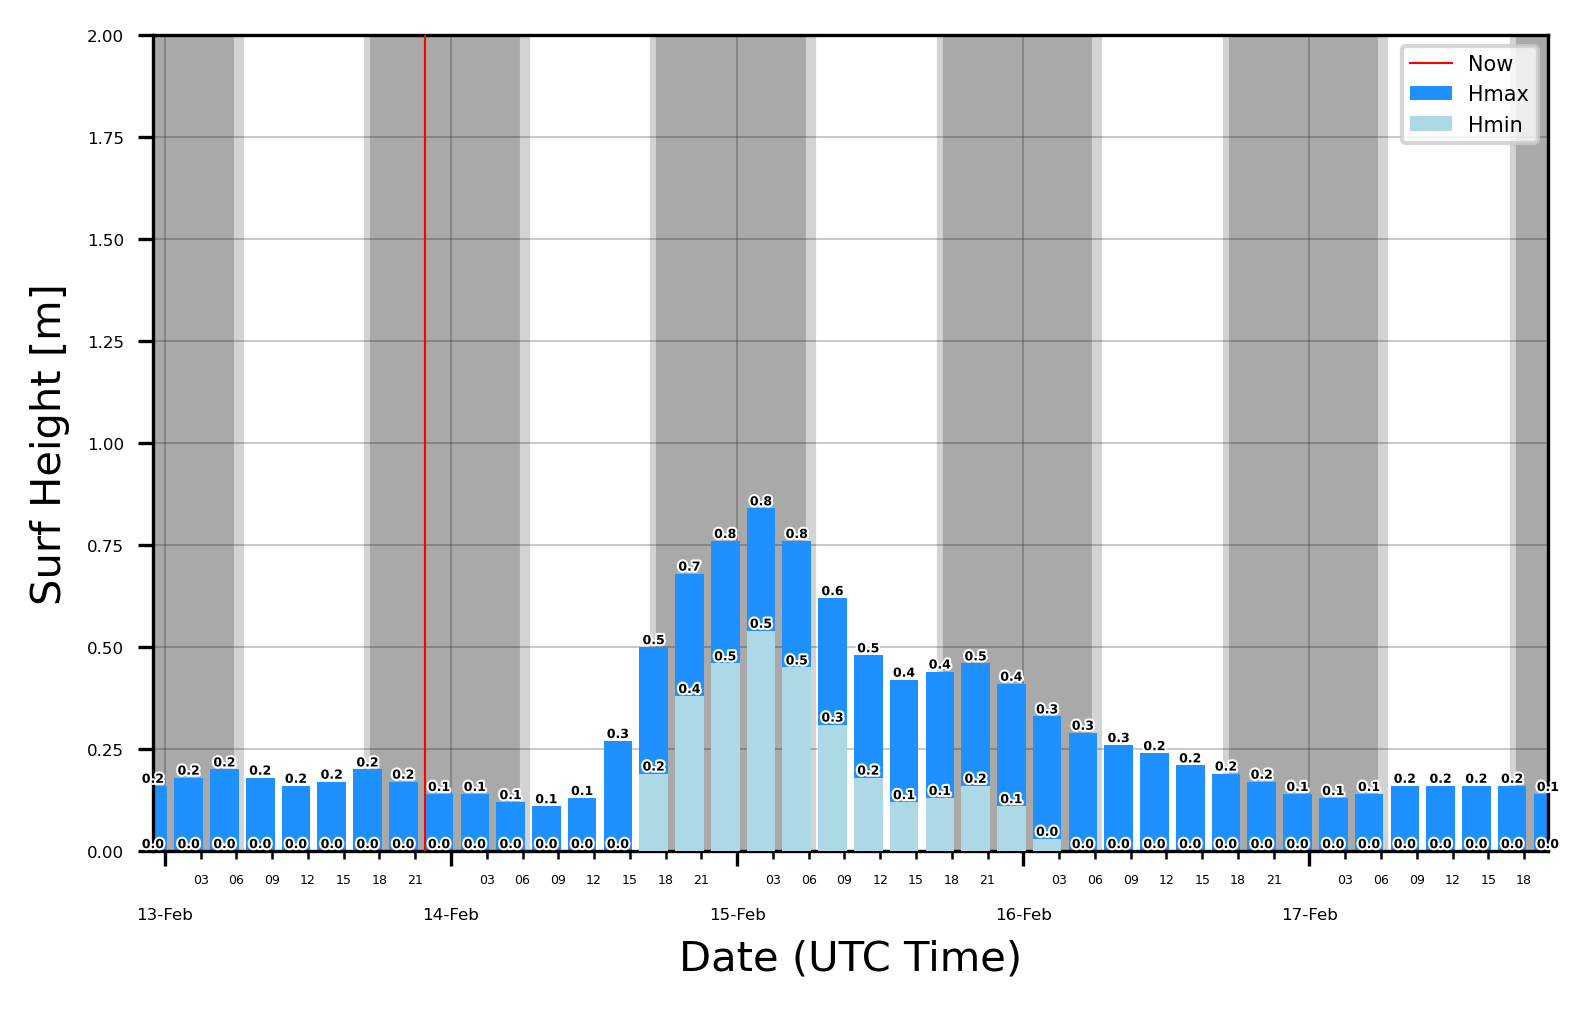

In [97]:
f, ax = plt.subplots(dpi=300)
surf_colors = {"Hmax": "dodgerblue", "Hmin": "lightblue"}
wind_colors = {"Cross-shore": "gold", "Offshore": "green", "Onshore": "darkred"}
surf["hist_color"] = surf["directionType"].map(colors)

# zorder 0
# night and day
for i, x in daylight.iterrows():
    ax.axvspan(x["midnight"], x["dawn"], color="darkgrey", zorder=0)
    ax.axvspan(x["dawn"], x["sunrise"], color="lightgrey", zorder=0)
    ax.axvspan(x["sunset"], x["dusk"], color="lightgrey", zorder=0)
    ax.axvspan(
        x["dusk"],
        x["midnight"] + datetime.timedelta(days=1),
        color="darkgrey",
        zorder=1
        )



#zorder 1
# grid
ax.grid(axis="y", which="major", zorder=1, linewidth=0.1, color="k")
ax.grid(axis="x", which="major", zorder=1, linewidth=0.1, color="k")

#zorder 2
#bars
p1 = ax.bar(
    surf.index,
    surf["surf_max"],
    color="dodgerblue",
    label="Hmax",
    zorder=2,
    width=0.1,
)
p2 = ax.bar(
    surf.index,
    surf["surf_min"],
    color="lightblue",
    label="Hmin",
    zorder=3,
    width=0.1,
)
#zorder 3
# barlabels
ax.bar_label(
    p1,
    label_type="edge",
    zorder=3,
    size=3,
    fmt="%.1f",
    weight="bold",
    path_effects=[pe.withStroke(linewidth=1, foreground="w")],
)
ax.bar_label(
    p2,
    label_type="edge",
    zorder=3,
    size=3,
    fmt="%.1f",
    weight="bold",
    path_effects=[pe.withStroke(linewidth=1, foreground="w")],
)

# dates index
ax.figure.autofmt_xdate()
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=(0, 3, 6, 9, 12, 15, 18, 21)))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.set(xlabel="Date (UTC Time)", ylabel="Surf Height [m]")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H"))

# Rotates and right-aligns the x labels so they don't crowd each other.
ax.tick_params(axis="x", which="major", pad=10)
for label in ax.get_yticklabels(which="major"):
    label.set(rotation=0, size=4)
for label in ax.get_xticklabels(which="major"):
    label.set(rotation=0, horizontalalignment="center", size=4)
for label in ax.get_xticklabels(which="minor"):
    label.set(horizontalalignment="center", size=3)

# now line
ax.axvline(
    datetime.datetime.now(datetime.timezone.utc),
    color="r",
    label="Now",
    linewidth=0.5,
    zorder=5,
)

# limits
if surf["surf_max"].max() < 2:
    ax.set_ylim([0, 2])
ax.set_xlim([surf.index[0], surf.index[-1]])

ax.legend(fontsize=5)
